# The Atlas of Economic Complexity

# Dictionary: 

1) **Distance (distance):** The extent of a location's existing capabilities to make the product" based on the products distance to current exports as measured by co-export probabilities.
2) **Economic complexity index (eci):** Country rank base on its export basket's diversification and complexity.
3) **Complexity Outlook Index (oppval):** "A measure of how many complex products are near (to) a country’s current set of productive capabilities"
4) **Opportunity gain (oppgai):** How much a location could benefit from developing a particular product.
5) **Product complexity index (pci):** "Ranks the diversity and sophistication of production know-how required to produce a product" based on the other number of countries producing that product and their economic complexity.
6) **Revealed comparative advantage (rca):** Whether a country is an 'effective' exporter of a product (i.e. exports more than its 'fair share`). The bigger the value, the more important exporter the country is.
7) **Per capita export intensity (rpop):** An alternative measure of export intensity. The ratio of exports per capita of a country-product over the exports per capita of that product in the world.
8) **Country-Product connection (mcp):** Marks whether the particular country exports the specific product with an rca greater than 1. This also allows us to measure country diversity and product ubiquity.

In [3]:
pip install -q git+https://github.com/cid-harvard/py-ecomplexity@develop # Harvard

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [32]:
pip install -q economic_complexity # MIT

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
pip install -q econci 

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pltimport 
ecomplexity # Harvard
import economic_complexity as ecplx # MIT
import econci # MIT

In [29]:
# Import trade data from CID Atlas
data_url = "https://intl-atlas-downloads.s3.amazonaws.com/country_hsproduct2digit_year.csv.zip"
data = pd.read_csv(data_url, compression="zip", low_memory=False)
data = data[['year','location_code','hs_product_code','export_value']]
data.head()

,year,location_code,hs_product_code,export_value
0,1995,ABW,01,20473.0
1,1996,ABW,01,0.0
2,1997,ABW,01,0.0
3,1998,ABW,01,0.0
4,1999,ABW,01,16530.0


In [27]:
# Calculate complexity
trade_cols = {'time':'year', 'loc':'location_code', 'prod':'hs_product_code', 'val':'export_value'}
cdata = ecomplexity.ecomplexity(data, trade_cols)

1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016


In [28]:
# Calculate proximity matrix
prox_df = ecomplexity.proximity(data, trade_cols)

1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016


In [24]:
cdata.head()

,location_code,hs_product_code,export_value,year,diversity,ubiquity,mcp,eci,pci,density,coi,cog,rca
0,ABW,01,20473.0,1995,4.0,48.0,0.0,-1.519109,-0.477711,0.043410,-1.223331,0.274608,0.009706
1,ABW,02,30728.0,1995,4.0,27.0,0.0,-1.519109,0.290548,0.039899,-1.223331,0.690750,0.003642
2,ABW,03,0.0,1995,4.0,101.0,0.0,-1.519109,-1.386704,0.048414,-1.223331,-0.125345,0.000000
3,ABW,04,686316.0,1995,4.0,31.0,0.0,-1.519109,1.257095,0.035947,-1.223331,0.821089,0.109605
4,ABW,05,0.0,1995,4.0,65.0,0.0,-1.519109,-0.783735,0.039220,-1.223331,0.089242,0.000000


Text(0, 0.5, 'Economic density')

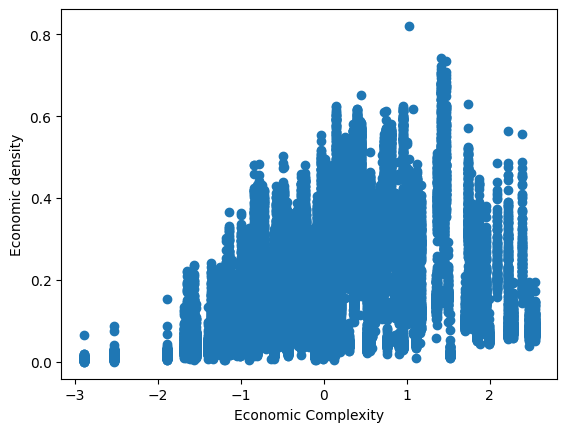

In [25]:
cdata_2019 = cdata[cdata['year']==2016]

plt.scatter(cdata_2019['eci'], cdata_2019['density'])
plt.xlabel('Economic Complexity')
plt.ylabel('Economic density')


In [21]:
"""
comp = econci.Complexity(cdata, c='location_code', p='hs_product_code', values='export_value')
comp.calculate_indexes()
eci = comp.eci
pci = comp.pci

# creating the product space
comp.create_product_space()

# the graphs are networkx.Graph objects
complete_graph = comp.complete_graph  # complete product space
max_spanning_tree = comp.maxst  # maximum spanning tree
prod_space = comp.product_space  # product space

# edges_nodes_to_csv saves one csv file with edges and weights
# and another file with nodes information
econci.edges_nodes_to_csv(prod_space, graph_name='prod_space', dir_path='C:\\Users\\iorueta\\Desktop\\PC IGNACIO\\0.LSE\\MPA DSPP\\1. Autumm Term 2024\\PP434 Automated Data Visualisation for Policymaking\\Project (80%)\\ignacioorueta.github.io-main')
"""

c:\Users\iorueta\AppData\Local\Programs\Python\Python312\Lib\site-packages\econci\utils.py:24: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  edges[['source', 'target']] = edges[['source', 'target']].replace(dic_nodes)
